# Семинары 3.1 и 3.2 по теме:
# «Нелинейная регрессия»

# Выполнил:
# Радайкин Артём, ПМ20-4 

## Загружаем данные

In [ ]:
install.packages('lmtest')
library('lmtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
df = read.csv('econometr_3.csv', header=T, sep=';', dec=',')
df

Номер.предприятия,y,x1,x2
<int>,<int>,<dbl>,<int>
1,7,3.9,10
2,7,3.9,14
3,7,3.7,15
4,7,4.0,16
5,7,3.8,17
6,7,4.8,19
7,8,5.4,19
8,8,4.4,20
9,8,5.3,20


In [ ]:
predict_df = read.csv('eco_predict_3.csv', header=T, sep=';', dec=',')
predict_df

Номер.предприятия,y,x1,x2
<int>,<lgl>,<dbl>,<dbl>
21,NA,6.19,22.3
22,NA,9.60,36.0
23,NA,3.70,10.0


**1. Оцените показатели вариации каждого признака и сделать вывод о возможностях 
применения МНК для их изучения.**

In [ ]:
cv_x1 <- (sd(df[,3]) / mean(df[,3])) * 100
cv_x1

[1] 31.32106

In [ ]:
cv_x2 <- (sd(df[,4]) / mean(df[,4])) * 100
cv_x2

[1] 30.55638

In [ ]:
cv_y <- ((sd(df[,2]) / mean(df[,2])) * 100)
cv_y

[1] 25.60489

## Так как вариация каждой переменной не превышает 35% и является сопоставимой, => возможно применение МНК


**2. Проанализируйте линейные коэффициенты парной и частной корреляции. Постройте
диаграммы рассеяния.**

In [ ]:
# Парная корреляция:
cor_x1_y = cor(df[,2], df[,3])
cor_x2_y = cor(df[,2], df[,4])
cor_x1_x2 = cor(df[,3], df[,4])

In [ ]:
cor_x1_y

[1] 0.9698814

In [ ]:
cor_x2_y

[1] 0.9408

## Парная линейная связь между рассматриваемыми переменными сильная (т.к. коэф корр больше 0.7) 

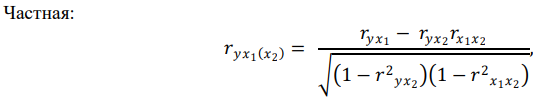

In [ ]:
# Частная корреляция:
r_yx1_x2 = (cor_x1_y - cor_x2_y*cor_x1_x2 )/sqrt((1 - cor_x2_y**2)*(1-cor_x1_x2**2)) 
r_yx1_x2

[1] 0.7335295

In [ ]:
r_yx2_x1 = (cor_x2_y - cor_x1_y*cor_x1_x2 )/sqrt((1 - cor_x1_y**2)*(1-cor_x1_x2**2)) 
r_yx2_x1

[1] 0.3247193

## Диаграммы рассеяния

In [ ]:
y_p = df[,2]
x1_p = df[,3]
x2_p = df[,4]

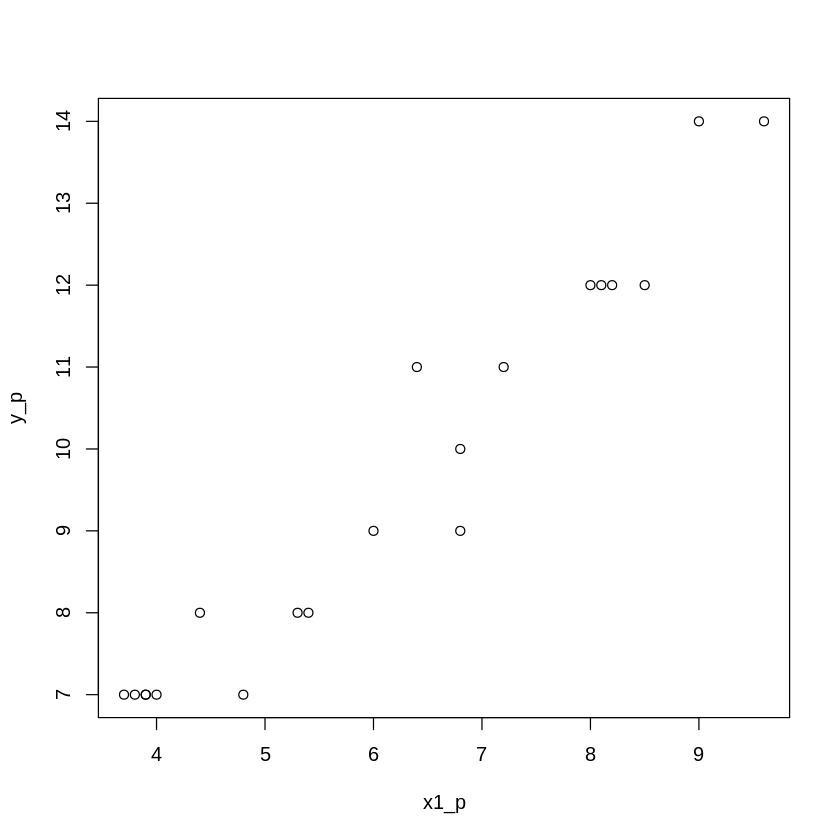

In [ ]:
plot(x1_p, y_p)

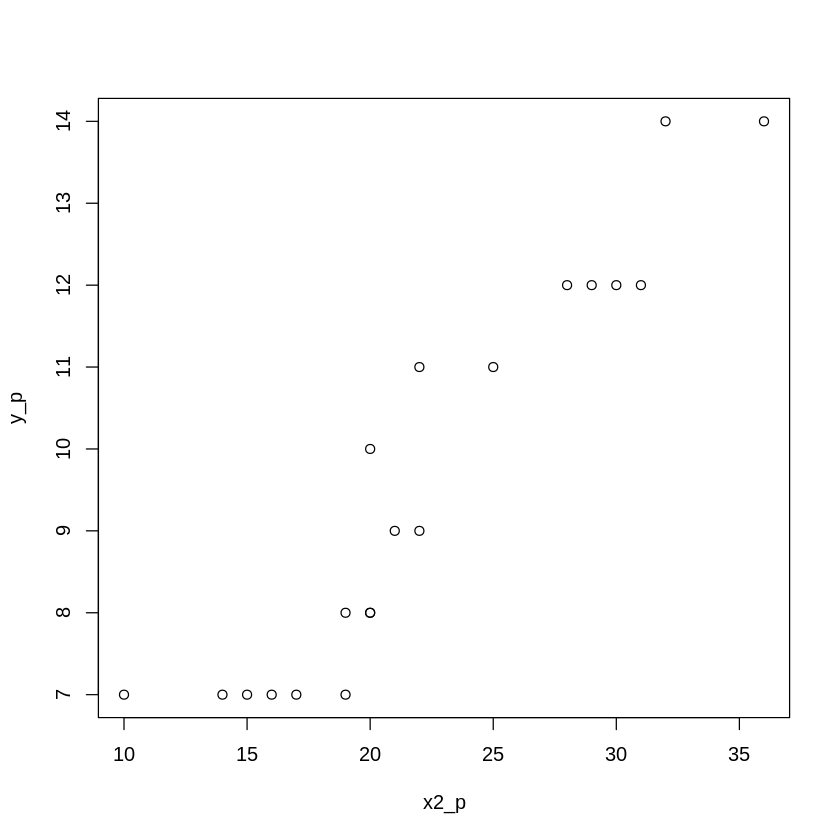

In [ ]:
plot(x2_p, y_p)

**3. Напишите уравнение множественной регрессии, оцените значимость его параметров, 
поясните их экономический смысл и определите их интервальные оценки**

## Построение модели


In [ ]:
model = lm(y ~ x1 + x2, data=df)

In [ ]:
summary(model)


Call:
lm(formula = y ~ x1 + x2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15134 -0.36423  0.06724  0.30358  1.22704 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.83531    0.47106   3.896 0.001162 ** 
x1           0.94595    0.21258   4.450 0.000351 ***
x2           0.08562    0.06048   1.416 0.174964    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5987 on 17 degrees of freedom
Multiple R-squared:  0.9469,	Adjusted R-squared:  0.9407 
F-statistic: 151.7 on 2 and 17 DF,  p-value: 1.45e-11


Y_hat = 1.83531 + 0.94595 * x1 + 0.08562 * x2 
       

> (0.47106)    (0.21258)      (0.06048)

> F-statistic: 151.7

> R-squared (R^2):  0.9469

> Adjusted R-squared (R^2_adj):  0.9407

> Residual standard error (Se): 0.5987

> n = 20; k = 2; n-k-1 = 17

> A_mean = 4.77096825636589 % (посчитанно ниже)


## Значимость параметров:

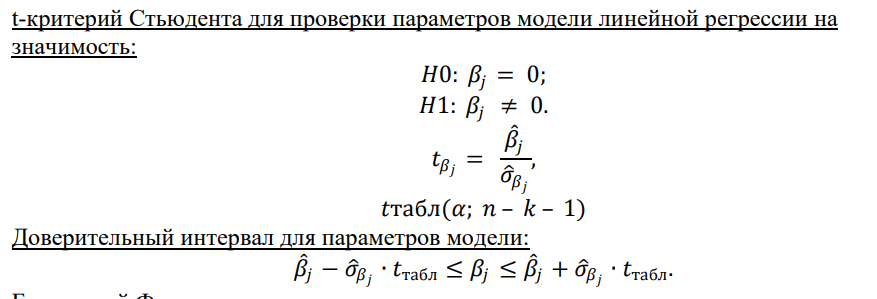

In [ ]:
t_b0 = 3.896
t_b1 = 4.450
t_b2 = 1.416
t_fr = 2.1098 # t_табл(0.05/2, 17)

> |t_b0|, |t_b1| > t_табл => гипотеза H0 отвергается => параметры модели значимы

> |t_b2| < t_табл => гипотеза H0 не отвергается => параметр модели незначим




## Интервальные оценки параметров

In [ ]:
paste0((1.83531 - t_fr*0.47106), ' <= b0 <= ', (1.83531 + t_fr*0.47106))
paste0((0.94595 - t_fr*0.21258), ' <= b1 <= ', (0.94595 + t_fr*0.21258))
paste0((0.08562 - t_fr*0.06048), ' <= b2 <= ', (0.08562 + t_fr*0.06048))

[1] "0.841467612 <= b0 <= 2.829152388"

[1] "0.497448716 <= b1 <= 1.394451284"

[1] "-0.041980704 <= b2 <= 0.213220704"

**4. С помощью F-критерия Фишера оцените статистическую надёжность уравнения 
регрессии и 𝑅^2. Сравните значения скорректированного и нескорректированного линейных 
коэффициентов множественной детерминации. Рассчитайте значение средней 
относительной ошибки аппроксимации.**

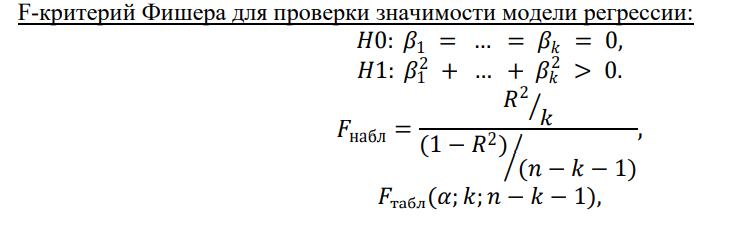

In [ ]:
F_stat = 151.7 # F_набл
F_fr = 3.5915 # F_табл(0.05, 2, 17)
R_2 = 0.9469
R_adj = 0.9407

yi_hat = predict(model)

A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean = ', A_mean, ' %' )

[1] "A_mean = 4.77096825636589 %"

> F_набл > F_табл => гипотеза H0 отвергается => модель значима

> R^2 и R_adj близки к единице , следовательно регрессионные прогноз достаточно точен

> Также R^2 > R_adj , но отличаются значения несущественно 


**5.Построите точечный и интервальный прогнозы для 21-23 предприятий на основе данных Таблицы 2**

In [ ]:
predict_df = read.csv('eco_predict_3.csv', header=T, sep=';', dec=',')
predict_df

Номер.предприятия,y,x1,x2
<int>,<lgl>,<dbl>,<dbl>
21,NA,6.19,22.3
22,NA,9.60,36.0
23,NA,3.70,10.0


## Точечный прогноз

In [ ]:
predict(model, newdata = predict_df, interval = "confidence") # точечный

,fit,lwr,upr
1,9.600000,9.317566,9.882434
2,13.998645,13.340364,14.656927
3,6.191491,5.494920,6.888063


## Интервальный прогноз

In [ ]:
predict(model, newdata = predict_df, interval = "prediction") # интервальный

,fit,lwr,upr
1,9.600000,8.305724,10.894276
2,13.998645,12.574315,15.422975
3,6.191491,4.749065,7.633918


**6. Построите парную модель регрессии с фактором, который имеет более тесную связь с 
зависимой переменной.**

In [ ]:
# Парная корреляция:
cor_x1_y = cor(df[,2], df[,3])
cor_x2_y = cor(df[,2], df[,4])
cor_x1_x2 = cor(df[,3], df[,4])

In [ ]:
cor_x1_y

[1] 0.9698814

In [ ]:
cor_x2_y

[1] 0.9408

## Так как корреляция у 1 коэф регрессиии больше, чем у второго, то берём x1

In [ ]:
model_x1 = lm(y ~ 1 + x1, data=df)

In [ ]:
summary(model_x1)


Call:
lm(formula = y ~ 1 + x1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3501 -0.3849  0.1255  0.2467  1.1418 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.98839    0.47109   4.221 0.000514 ***
x1           1.22966    0.07279  16.893 1.74e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6151 on 18 degrees of freedom
Multiple R-squared:  0.9407,	Adjusted R-squared:  0.9374 
F-statistic: 285.4 on 1 and 18 DF,  p-value: 1.736e-12


Y_hat = 1.98839 + 1.22966 * x1 

> (0.47109)    (0.07279)    

> F-statistic: 285.4

> R-squared (R^2):  0.9407

> Adjusted R-squared (R^2_adj):  0.9374

> Residual standard error (Se): 0.6151

> n = 20; k = 1; n-k-1 = 18

> A_mean = 5.10575843255104 % % (посчитанно ниже)

## Изначальная модель

In [ ]:
summary(model)


Call:
lm(formula = y ~ x1 + x2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15134 -0.36423  0.06724  0.30358  1.22704 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.83531    0.47106   3.896 0.001162 ** 
x1           0.94595    0.21258   4.450 0.000351 ***
x2           0.08562    0.06048   1.416 0.174964    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5987 on 17 degrees of freedom
Multiple R-squared:  0.9469,	Adjusted R-squared:  0.9407 
F-statistic: 151.7 on 2 and 17 DF,  p-value: 1.45e-11


Y_hat = 1.83531 + 0.94595 * x1 + 0.08562 * x2 
       

> (0.47106)    (0.21258)      (0.06048)

> F-statistic: 151.7

> R-squared (R^2):  0.9469

> Adjusted R-squared (R^2_adj):  0.9407

> Residual standard error (Se): 0.5987

> n = 20; k = 2; n-k-1 = 17

> A_mean = 4.77096825636589 % 


**7. Сравните качество построенных моделей.**

Посчитаем значение средней относительной ошибки аппроксимации для модели:

In [ ]:
yi_hat = predict(model_x1)
A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean = ', A_mean, ' %' )

[1] "A_mean = 5.10575843255104 %"

## Т.к. значение R^2 и R^2_adj у первой модели множ регресии соответсвенно больше, чем значения R^2 и R^2_adj у второй модели парной регресии (от x1), а также значение средней относительной ошибки аппроксимации у парной регресии больше, чем у множ, то => изначальная модель множественной регресии (от x1 и x2) наиболее точно апроксимирует исходные данные  

#**Итоговый отчёт**

Y_hat = 1.83531 + 0.94595 * x1 + 0.08562 * x2 
       

> (0.47106)    (0.21258)      (0.06048)

> F-statistic: 151.7

> R-squared (R^2):  0.9469

> Adjusted R-squared (R^2_adj):  0.9407

> Residual standard error (Se): 0.5987

> n = 20; k = 2; n-k-1 = 17

> A_mean = 4.77096825636589 % 


**Выводы: Так как коэфф детерминации и скорректировннаый коэфф детерминации близки к единице, а ср отн ошибка аппроксимации меньше 5%, то качество модели высокое**

## Экономическая интерпретация параметров модели

### Выработка продукции на одного работника составляет 1.83531(тыс.руб.) в случае, если в эксплуатацию не вводятся новые основные фонды и в организации отсутствуют работники с высокой квалификацией.
### При вводе в действие новых основных фондов в размере 1% от их стоимости на конец года приводит к увеличению выработки продукции на одного работника на 0.94595(тыс.руб).
### При учёте удельного веса рабочих высокой квалификации в общей численности рабочих в размере 1%, приводит к увеличению выработки продукции на одного работника на 0.08562(тыс.руб).


**8. Сравните две модели, используя тест на длинную/короткую регрессию.**

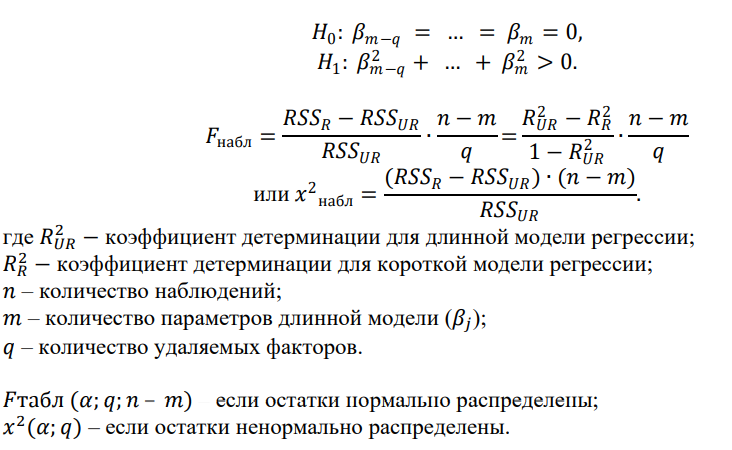

In [ ]:
waldtest(model_x1, model, test = c("Chisq"))

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,18,NA,NA,NA
2,17,1,2.003812,0.1569042


### Т.к. P_value > alfa (0.1569042 > 0.05) => H0 верна => Предпочтительнее короткая модель регрессии


**9. Выбранную модель проверьте на наличие пропущенных переменных, используя тест 
Рамсея.**

Строим вспомогательную модель регрессиии от x1 

$$ \hat{\hat{y_i}} =a+b_1+x_{1i} +b_2\hat{y_i}^2 +b_3\hat{y_i}^3$$

$$\hat{y_i} =a+b_1+x_{1i}$$

---

$$ H_0: b_2=b_3=0 $$

$$ H_1: b_2^2=b_3^2=0 $$


In [ ]:
resettest(model_x1, type="regressor")


	RESET test

data:  model_x1
RESET = 2.188, df1 = 2, df2 = 16, p-value = 0.1445


$$ \text{Т.к. } p_v > alfa \text{     (0.1445 > 0.05)} => {H_0} \text{ - верна} => \text{} $$


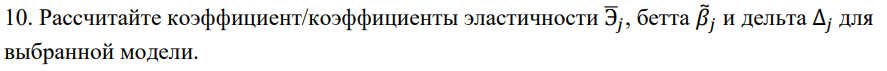

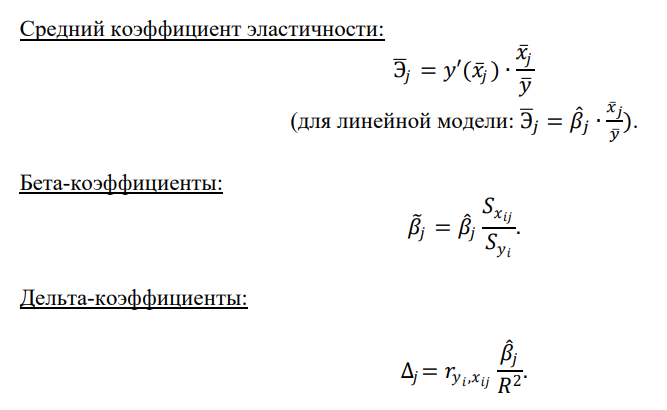

In [ ]:
E_x1 = 1.22966 * (mean(df[,3])/mean(df[,2])) # Средний коэффициент эластичности
E_x1

[1] 0.7928745

### С увеличением x1 на 1%, y увеличится на 0.79%

In [ ]:
beta1 = 1.22966 * (sd(df[,3])/sd(df[,2])) # Бета-коэффициент
beta1

[1] 0.9698799

### При изменении x1 на одно СКО, y изменится на 0.97 своего СКО


In [ ]:
delta_coef_x1 = cor_x1_y*(1.22966/0.9407)
delta_coef_x1

[1] 1.267805

### Дельта коэф показывает среднюю долю влияния соответствующего фактора в совокупном влиянии всех факторов, включённых в модель 

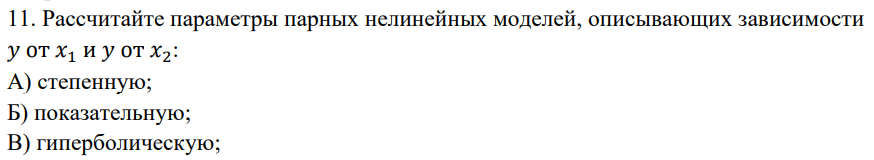

### a)

**Найдём все параметры для нелинейных моделей, описывающих зависимости y от x1**



In [ ]:
model_x1_l10 = lm(log10(y) ~ log10(x1), data=df)

In [ ]:
summary(model_x1_l10)


Call:
lm(formula = log10(y) ~ log10(x1), data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.061285 -0.016759  0.006899  0.018429  0.045643 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.39016    0.03871   10.08 7.92e-09 ***
log10(x1)    0.75119    0.04946   15.19 1.05e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0303 on 18 degrees of freedom
Multiple R-squared:  0.9276,	Adjusted R-squared:  0.9236 
F-statistic: 230.7 on 1 and 18 DF,  p-value: 1.047e-11


In [ ]:
a = 10**(0.39016) 
a

[1] 2.455613

$$ Y_{hat} = 2.45561343047769 * x_1^{0.75119}$$

In [ ]:
yi_hat = 10**predict(model_x1_l10)

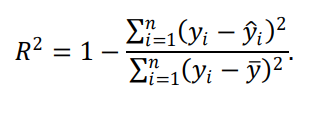

In [ ]:
R_2 = 1 - (sum((y_p - yi_hat)**2))/(sum((y_p - mean(y_p))**2)) 
R_2

[1] 0.9317241

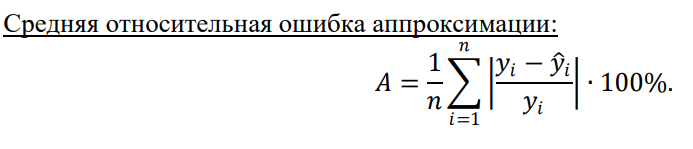

In [ ]:
A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean  =  ', A_mean, ' %' )

[1] "A_mean  =  5.38794553730334 %"

**Найдём все параметры для нелинейных моделей, описывающих зависимости y от x2**


In [ ]:
model_x2_l10 = lm(log10(y) ~ log10(x2), data=df)

In [ ]:
summary(model_x2_l10)


Call:
lm(formula = log10(y) ~ log10(x2), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08860 -0.03175 -0.00156  0.02305  0.11087 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01865    0.10548   0.177    0.862    
log10(x2)    0.71558    0.07901   9.057 4.01e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04778 on 18 degrees of freedom
Multiple R-squared:   0.82,	Adjusted R-squared:   0.81 
F-statistic: 82.03 on 1 and 18 DF,  p-value: 4.01e-08


In [ ]:
a = 10**(0.01865) 
a

[1] 1.043879

$$ Y_{hat} = 1.04387861337235 * x_1^{0.71558}$$

In [ ]:
yi_hat = 10**predict(model_x2_l10)

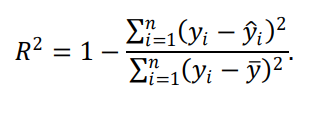

In [ ]:
R_2 = 1 - (sum((y_p - yi_hat)**2))/(sum((y_p - mean(y_p))**2)) 
R_2

[1] 0.8655574

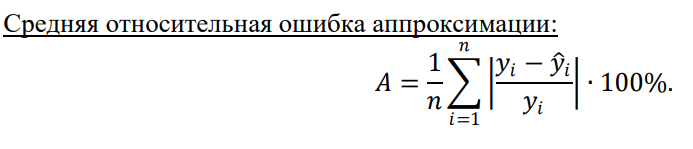

In [ ]:
A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean  =  ', A_mean, ' %' )

[1] "A_mean  =  8.23468508157368 %"

### б)

**Найдём все параметры для нелинейных моделей, описывающих зависимости y от x1**

In [ ]:
model_x1_log = lm(log(y) ~ x1, data=df)

In [ ]:
summary(model_x1_log)


Call:
lm(formula = log(y) ~ x1, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.111344 -0.028152  0.001943  0.025739  0.140049 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.446300   0.045028   32.12  < 2e-16 ***
x1          0.126804   0.006957   18.23 4.76e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0588 on 18 degrees of freedom
Multiple R-squared:  0.9486,	Adjusted R-squared:  0.9457 
F-statistic: 332.2 on 1 and 18 DF,  p-value: 4.757e-13


In [ ]:
a = exp(1)**(1.446300) 
a

[1] 4.24737

In [ ]:
b = exp(1)**(0.126804)
b 

[1] 1.135194

$$ Y_{hat} = 4.24737 * 1.135194^{x}$$

In [ ]:
yi_hat = exp(1)**predict(model_x1_log)

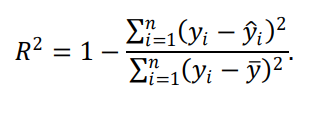

In [ ]:
R_2 = 1 - (sum((y_p - yi_hat)**2))/(sum((y_p - mean(y_p))**2)) 
R_2

[1] 0.9507531

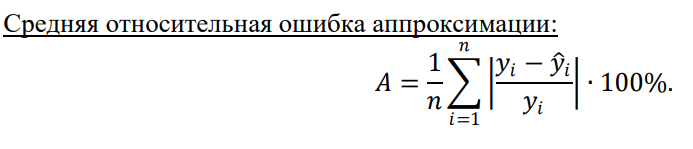

In [ ]:
A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean  =  ', A_mean, ' %' )

[1] "A_mean  =  3.99755108928236 %"

**Найдём все параметры для нелинейных моделей, описывающих зависимости y от x2**


In [ ]:
model_x2_log = lm(log(y) ~ x2, data=df)

In [ ]:
summary(model_x2_log)


Call:
lm(formula = log(y) ~ x2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17103 -0.06672 -0.01828  0.06021  0.17707 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.45898    0.07214   20.22 7.94e-14 ***
x2           0.03463    0.00310   11.17 1.59e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09209 on 18 degrees of freedom
Multiple R-squared:  0.8739,	Adjusted R-squared:  0.8669 
F-statistic: 124.8 on 1 and 18 DF,  p-value: 1.587e-09


In [ ]:
a = exp(1)**(1.45898) 
a

[1] 4.30157

In [ ]:
b = exp(1)**(0.03463)
b 

[1] 1.035237

$$ Y_{hat} = 4.30156968882505 * 1.03523660038679^{x}$$

In [ ]:
yi_hat = exp(1)**predict(model_x2_log)

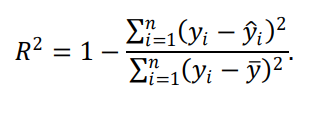

In [ ]:
R_2 = 1 - (sum((y_p - yi_hat)**2))/(sum((y_p - mean(y_p))**2)) 
R_2

[1] 0.8888747

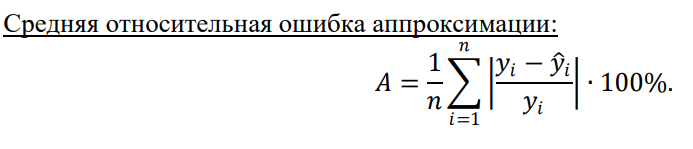

In [ ]:
A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean  =  ', A_mean, ' %' )

[1] "A_mean  =  7.00667064325608 %"

### в)

**Найдём все параметры для нелинейных моделей, описывающих зависимости y от x1**

In [ ]:
model_hyp_x1 = lm(y ~ 1 + 1/x1, data=df)

In [ ]:
summary(model_hyp_x1)


Call:
lm(formula = y ~ 1 + 1/x1, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
  -2.6   -2.6   -0.6    2.4    4.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6000     0.5496   17.47 3.68e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.458 on 19 degrees of freedom


$$ Y_{hat} = b + a/{x}$$

In [ ]:
yi_hat = predict(model_hyp_x1)

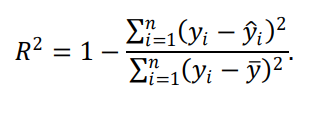

In [ ]:
R_2 = 1 - (sum((y_p - yi_hat)**2))/(sum((y_p - mean(y_p))**2)) 
R_2

[1] 0.9507531

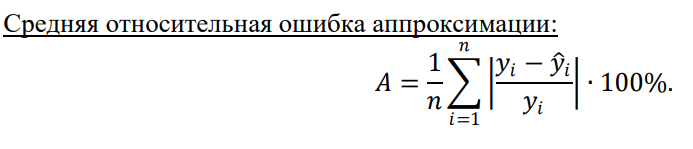

In [ ]:
A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean  =  ', A_mean, ' %' )

[1] "A_mean  =  3.99755108928236 %"

**Найдём все параметры для нелинейных моделей, описывающих зависимости y от x2**


In [ ]:
model_x2_log = lm(log(y) ~ x2, data=df)

In [ ]:
summary(model_x2_log)


Call:
lm(formula = log(y) ~ x2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17103 -0.06672 -0.01828  0.06021  0.17707 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.45898    0.07214   20.22 7.94e-14 ***
x2           0.03463    0.00310   11.17 1.59e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09209 on 18 degrees of freedom
Multiple R-squared:  0.8739,	Adjusted R-squared:  0.8669 
F-statistic: 124.8 on 1 and 18 DF,  p-value: 1.587e-09


In [ ]:
a = exp(1)**(1.45898) 
a

[1] 4.30157

In [ ]:
b = exp(1)**(0.03463)
b 

[1] 1.035237

$$ Y_{hat} = 4.30156968882505 * 1.03523660038679^{x}$$

In [ ]:
yi_hat = exp(1)**predict(model_x2_log)

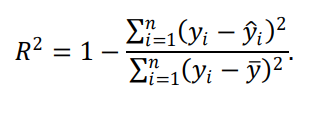

In [ ]:
R_2 = 1 - (sum((y_p - yi_hat)**2))/(sum((y_p - mean(y_p))**2)) 
R_2

[1] 0.8888747

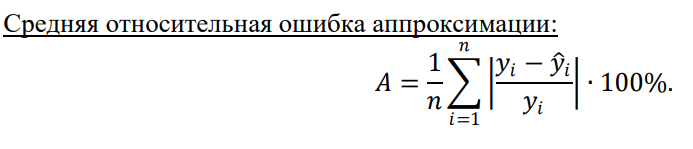

In [ ]:
A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean  =  ', A_mean, ' %' )

[1] "A_mean  =  7.00667064325608 %"